In [4]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full),(X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:5000], y_train_full[:5000]
X_valid, y_valid = X_train_full[:5000], y_train_full[:5000]

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
X_train.shape

(5000, 28, 28)

In [6]:
X_train.dtype

dtype('uint8')

In [7]:
X_train, X_vaild, X_test = X_train /255. , X_valid /255. ,X_test /255.

class_names = ["T-shirt/Top", "Trousers", "Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle Boot"]

In [8]:
class_names[y_train[0]]

'Ankle Boot'

# Creating the model using the sequential API

In [9]:
tf.random.set_seed(42) #so that the weights of hidden layers and output layer will be same everytime you run the notebook
# for randomly generating every time use : tf.keras.utils.set_random_seed()
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation = "relu"))
model.add(tf.keras.layers.Dense(100, activation = "relu"))
model.add(tf.keras.layers.Dense(10, activation = "softmax"))


In [10]:
# instead of adding layers one by one we can instead :

# model = tf.keras.Sequential([
#   tf.keras.layers.Flatten(input_shape=[28,28]),
#   tf.keras.layers.Dense(300, activation = "relu"),
#   tf.keras.layers.Dense(100, activation = "relu"),
#   tf.keras.layers.Dense(10, activation = "softmax")
# ])


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model.layers

access layers by name

In [13]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [14]:
model.get_layer("dense") is hidden1

True

# To get weights and biases

In [15]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.03176662,  0.07366408,  0.00684945, ..., -0.04316197,
         0.00251874, -0.06794322],
       [-0.05981485, -0.06508849,  0.06332135, ...,  0.04734395,
        -0.02699258,  0.04883052],
       [-0.04535474,  0.00497435,  0.0538377 , ..., -0.00553051,
         0.00549058,  0.04444306],
       ...,
       [-0.01233306,  0.04669226, -0.00329784, ..., -0.01631964,
        -0.05655312,  0.06367981],
       [-0.00642838, -0.01796999,  0.04553787, ...,  0.05714726,
        -0.04844069, -0.01882206],
       [-0.00088647, -0.07063396,  0.06890118, ...,  0.04758449,
        -0.04571526,  0.05580316]], dtype=float32)

In [16]:
weights.shape

(784, 300)

In [17]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [18]:
biases.shape

(300,)

In [19]:
model.compile(loss="sparse_categorical_crossentropy", optimizer = "sgd", metrics = ["accuracy"])

# sparse because we have sparse labels (each index has one target label)and classes are exclusive
# to measure its accuracy during training and evaluation we set metrics = accuracy

# Training and Evaluating

In [20]:
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid))

Epoch 1/30
157/157 [==============================] - 1s 5ms/step - loss: 1.4680 - accuracy: 0.5376 - val_loss: 56.5730 - val_accuracy: 0.6628
Epoch 2/30
157/157 [==============================] - 1s 4ms/step - loss: 0.8986 - accuracy: 0.7008 - val_loss: 63.7617 - val_accuracy: 0.6964
Epoch 3/30
157/157 [==============================] - 1s 4ms/step - loss: 0.7472 - accuracy: 0.7468 - val_loss: 63.1952 - val_accuracy: 0.7414
Epoch 4/30
157/157 [==============================] - 1s 4ms/step - loss: 0.6694 - accuracy: 0.7778 - val_loss: 59.6795 - val_accuracy: 0.7646
Epoch 5/30
157/157 [==============================] - 1s 4ms/step - loss: 0.6209 - accuracy: 0.7910 - val_loss: 71.9436 - val_accuracy: 0.7536
Epoch 6/30
157/157 [==============================] - 1s 4ms/step - loss: 0.5872 - accuracy: 0.8060 - val_loss: 60.0618 - val_accuracy: 0.7872
Epoch 7/30
157/157 [==============================] - 1s 4ms/step - loss: 0.5588 - accuracy: 0.8160 - val_loss: 68.5755 - val_accuracy: 0.7828

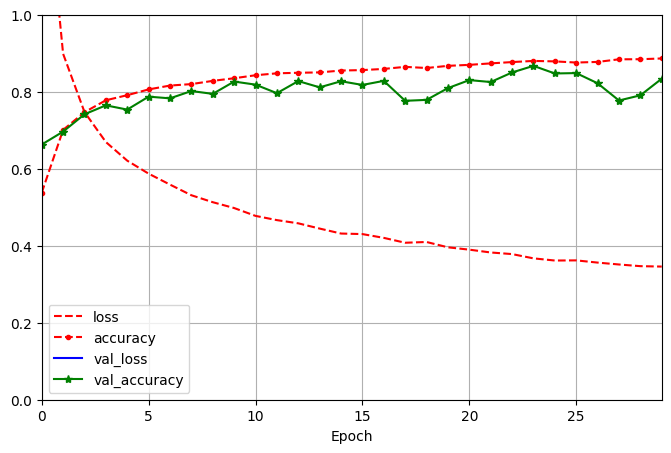

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(
    figsize =(8,5), xlim = [0,29], ylim=[0,1], grid = True, xlabel = "Epoch",
    style = ["r--", "r--.","b-","g-*" ])
plt.show()

In [22]:
model.evaluate(X_test, y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.5073 - accuracy: 0.8230


[0.5072541236877441, 0.8230000138282776]